In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tables

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [16]:
# import thr Nexus file
MC_file = tables.open_file("Inputs/Bi214_MC.h5",mode='r')
root = MC_file.root.MC
data = root
Nevents = len(data.events)
Nevents

1781

In [17]:
# Pull the extents so teh MC events can be sorted
DatL=[]
DatL.append(0)
for x in range(0,Nevents):
    DatL.append(data.extents[x]["last_hit"])

In [33]:
data.events.read()

array([(1000000, 2.6803718), (1000001, 2.4121363), (1000002, 2.447687 ),
       ..., (1001778, 2.5081575), (1001779, 2.4476926),
       (1001780, 2.3054347)],
      dtype=[('evt_number', '<i4'), ('evt_energy', '<f4')])

In [62]:
data.events.read()[48][0]

1000048

In [66]:
# for a specific event grab the hits
EVENT=91

MC_Xhit = []
MC_Yhit = []
MC_Zhit = []
MC_Ehit = []
MC_Ihit = []

for x in range(DatL[EVENT],DatL[EVENT+1]):

    MC_Xhit.append(data.hits[x]["hit_position"][0])
    MC_Yhit.append(data.hits[x]["hit_position"][1])
    MC_Zhit.append(data.hits[x]["hit_position"][2])
    MC_Ehit.append(data.hits[x]["hit_energy"])
    MC_Ihit.append(data.hits[x]["hit_time"])
MC_Xhit = np.array(MC_Xhit)
MC_Yhit = np.array(MC_Yhit)
MC_Zhit = np.array(MC_Zhit)
MC_Ehit = np.array(MC_Ehit)
MC_Ihit = np.array(MC_Ihit)


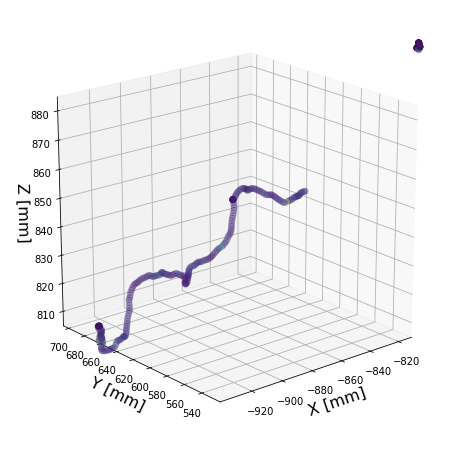

In [68]:
## Plot the MC truth
cmap = cm.viridis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(MC_Xhit, MC_Yhit, MC_Zhit, c=MC_Ehit, s=35, cmap=cmap)

ax.set_xlabel('X [mm]',fontsize=16)
ax.set_ylabel('Y [mm]',fontsize=16)
ax.set_zlabel('Z [mm]',fontsize=16)

mx = np.mean(MC_Xhit)
sx = np.std(MC_Xhit)
ax.set_xlim(mx-1*sx,mx+1*sx)

mx = np.mean(MC_Yhit)
sx = np.std(MC_Yhit)
ax.set_ylim(mx-1*sx,mx+1*sx)

mx = np.mean(MC_Zhit)
sx = np.std(MC_Zhit)
ax.set_zlim(mx-1*sx,mx+1*sx)

#plt.colorbar(sc)
#ax.set_xlim(60,100)
#ax.set_ylim(-640,-530)
#ax.set_zlim(280,300)

ax.view_init(20, 230)

plt.show()

In [6]:
1340-1170

170

In [69]:
# set some filter so it is centered at the orgin
MC_X_off = min(MC_Xhit[MC_Xhit>-940])
MC_Y_off = min(MC_Yhit[MC_Yhit>540])         
MC_Z_off = min(MC_Zhit[MC_Zhit>810])         

MC_Xhit_new = MC_Xhit - MC_X_off
MC_Yhit_new = MC_Yhit - MC_Y_off
MC_Zhit_new = MC_Zhit - MC_Z_off

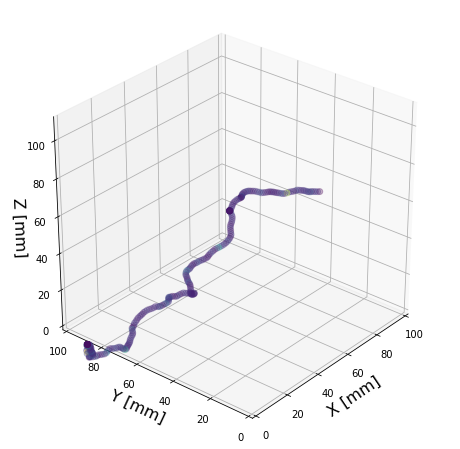

In [70]:
cmap = cm.viridis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(MC_Xhit_new, MC_Yhit_new, MC_Zhit_new, c=MC_Ehit, s=35, cmap=cmap)

ax.set_xlabel('X [mm]',fontsize=16)
ax.set_ylabel('Y [mm]',fontsize=16)
ax.set_zlabel('Z [mm]',fontsize=16)
#plt.colorbar(sc)

ax.set_xlim([0,100])
ax.set_ylim([0,100])
ax.set_zlim([0,110])
ax.view_init(30, 220)

plt.show()

In [71]:
# import the FANAL volelized file
reco_group_name = '/FANALIC/RECO_fwhm_05_voxel_3x3x3'
file_events = pd.read_hdf("Inputs/Bi214_RECO.h5", reco_group_name + '/events')
file_voxels = pd.read_hdf("Inputs/Bi214_RECO.h5", reco_group_name + '/voxels')
events_reco_df = pd.DataFrame()
voxels_reco_df = pd.DataFrame()
events_reco_df = pd.concat([events_reco_df, file_events], axis=0)
voxels_reco_df = pd.concat([voxels_reco_df, file_voxels], axis=0)

In [72]:
voxels_reco_df.index[16000]

(1000451, 23)

In [73]:
voxels_reco_df.X[1000091]

voxel_id
0    -951.172898
1    -951.172898
2    -951.172898
3    -951.172898
4    -951.172898
         ...    
91   -825.207527
92   -825.207527
93   -825.207527
94   -825.207527
95   -783.219070
Name: X, Length: 96, dtype: float64

In [75]:
# load the voxels, put in cm and round 
x = (voxels_reco_df.X[1000091]/3).round()
y = (voxels_reco_df.Y[1000091]/3).round()
z = (voxels_reco_df.Z[1000091]/3).round()
e = voxels_reco_df.E[1000091]

# off set them so they start at the origin
x = x - min(x)
y = y - min(y)
z = z - min(z)


In [76]:
x

voxel_id
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
91    42.0
92    42.0
93    42.0
94    42.0
95    56.0
Name: X, Length: 96, dtype: float64

In [77]:
# find the voxl dim and create a 3d array of that dim
x_dim = int(max(x))
y_dim = int(max(y))
z_dim = int(max(z))

VOXELS = np.zeros((x_dim+1,y_dim+1,z_dim+1))

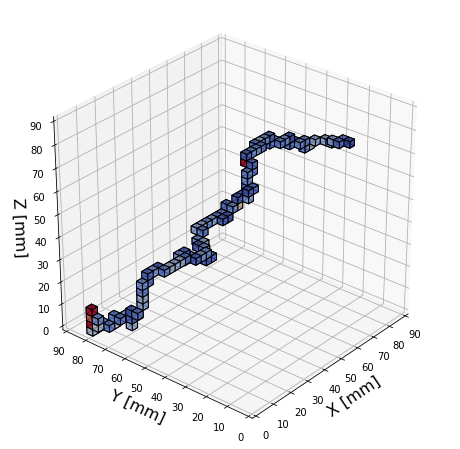

In [80]:
# sort through the event set the "turn on" the hit voxels 
cmap = cm.viridis
cmap = cm.Reds
cmap = cm.coolwarm

norm = Normalize(vmin=0, vmax=max(e))
norm = Normalize(vmin=0, vmax=0.09)

colors = np.empty(VOXELS.shape, dtype=object)
for q in range(0,len(z)):
    VOXELS[int(x[q])][int(y[q])][int(z[q])] = 1
    colors[int(x[q])][int(y[q])][int(z[q])] = cmap(norm(e[q]))

# and plot everything
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
#a,b,c is spacing in mm needs an extra dim
a,b,c = np.indices((x_dim+2,y_dim+2,z_dim+2))*3
ax.voxels(a,b,c, VOXELS , facecolors=colors , edgecolor='k',alpha=0.7)

ax.set_xlabel('X [mm]',fontsize=16)
ax.set_ylabel('Y [mm]',fontsize=16)
ax.set_zlabel('Z [mm]',fontsize=16)

ax.set_xlim([0,90])
ax.set_ylim([0,90])
ax.set_zlim([0,90])

ax.view_init(30, 220)

plt.show()

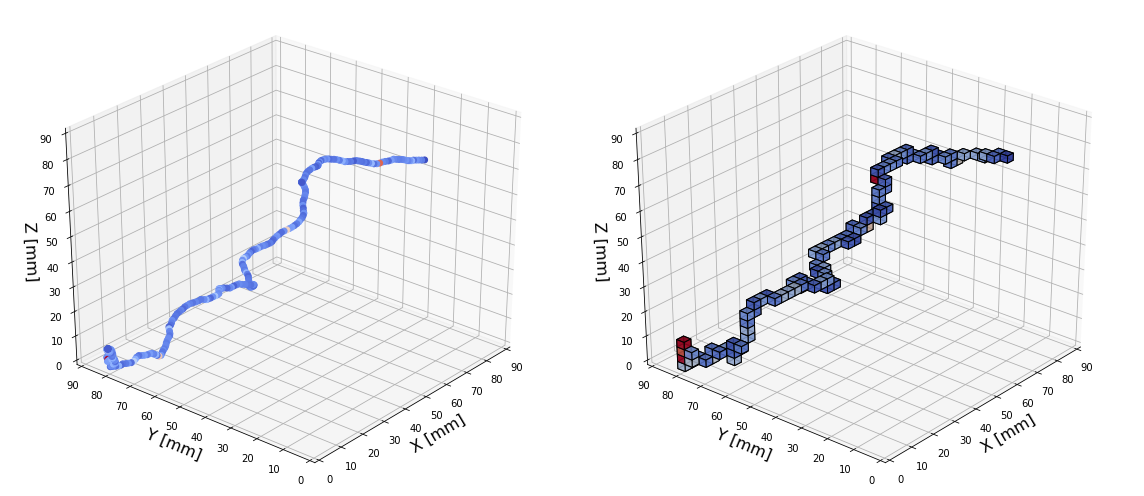

In [107]:
cmap = cm.viridis
cmap = cm.coolwarm

fig = plt.figure(figsize=(16,7))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(MC_Xhit_new+15, MC_Yhit_new+5, MC_Zhit_new, c=MC_Ehit, s=35, cmap=cmap)

ax1.set_xlabel('X [mm]',fontsize=16)
ax1.set_ylabel('Y [mm]',fontsize=16)
ax1.set_zlabel('Z [mm]',fontsize=16)

ax1.set_xlim([0,90])
ax1.set_ylim([0,90])
ax1.set_zlim([0,90])
ax1.view_init(30, 220)


ax2 = fig.add_subplot(122, projection='3d')
p = ax2.voxels(a,b,c, VOXELS , facecolors=colors , edgecolor='k',alpha=0.8)

ax2.set_xlabel('X [mm]',fontsize=16)
ax2.set_ylabel('Y [mm]',fontsize=16)
ax2.set_zlabel('Z [mm]',fontsize=16)
ax2.set_xlim([0,90])
ax2.set_ylim([0,90])
ax2.set_zlim([0,90])
ax2.view_init(30, 220)

#fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax2)
plt.tight_layout()
#plt.savefig("Bi214_3d_vox.png",bbox_inches='tight',dpi=400)
#plt.savefig("Bi214_3d_vox.pdf")

plt.show()

In [100]:
colors.flatten()

array([None, None, None, ..., None, None, None], dtype=object)